# MNIST Classification Project Demo

This notebook demonstrates the complete workflow of our MNIST classification project. In this demo, we will:

- Load and explore the MNIST dataset.
- Visualize sample images from the training and test sets.
- Plot the distribution of digit classes.
- Train and evaluate three different classifiers:
  - Random Forest (scikit‑learn)
  - Feed‑Forward Neural Network (PyTorch)
  - Convolutional Neural Network (PyTorch)
- View evaluation results including classification reports and confusion matrices.

In [5]:
# Import necessary libraries and modules
import numpy as np
import torch
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
 
# Import our custom modules
from loading_dataset import load_mnist, visualize_samples, plot_class_distribution
from result_plot import plot_metrics, plot_confusion_matrix
from models.rf import MnistRFClassifier
from models.nn import MnistNNClassifier
from models.cnn import MnistCNNClassifier

# Load the MNIST dataset
X_train, y_train, X_test, y_test = load_mnist()

# Print basic dataset information
print("Training Images Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Images Shape:", X_test.shape)
print("Test Labels Shape:", y_test.shape)

Dataset Train: x - 60000, y - 60000
Dataset Test: x - 10000, y - 10000
Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


## 1. Dataset Overview and Exploration

The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits.
Each image has a shape of 28x28 pixels. In the cells below, we will visualize sample images from both datasets and plot the class distribution.

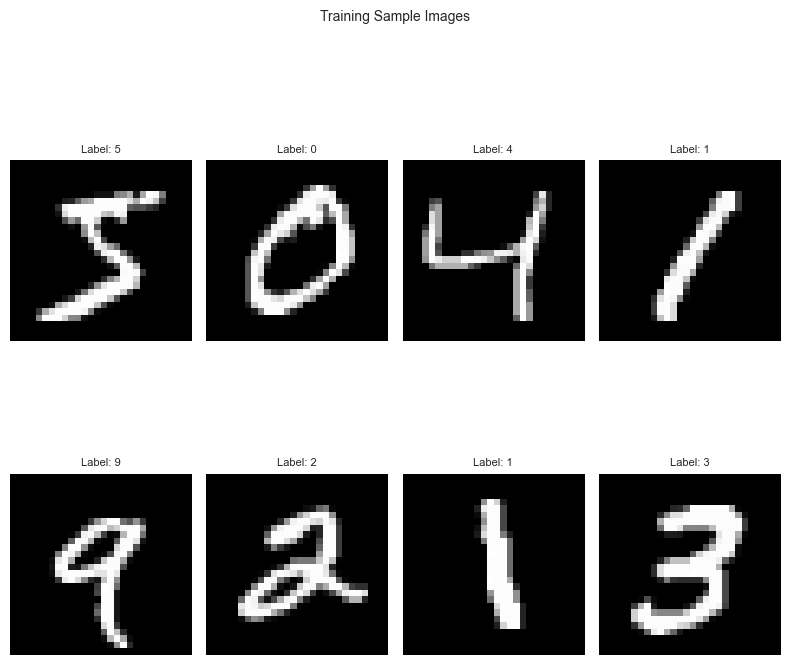

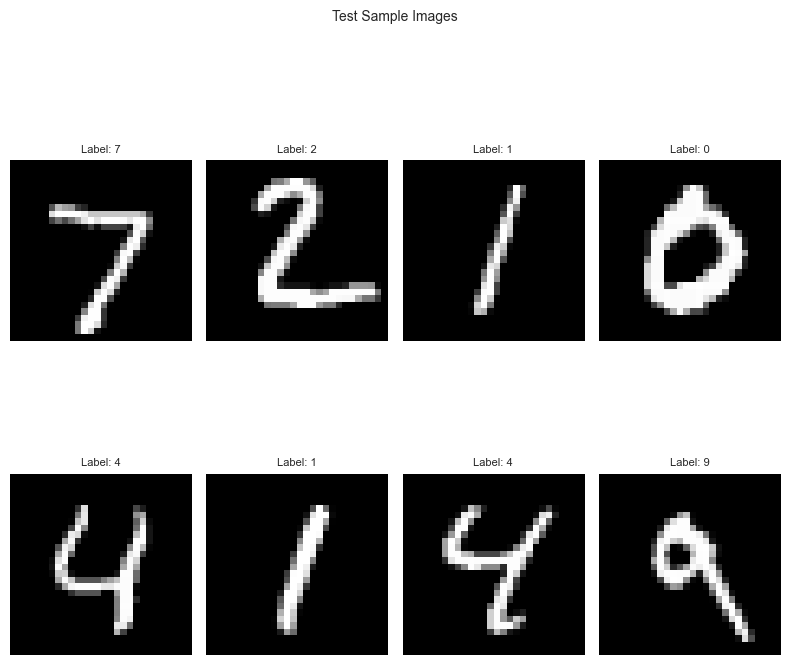

In [7]:
# Visualize 16 sample images from the training dataset
visualize_samples(X_train, y_train, dataset_name="Training")

# Visualize 16 sample images from the test dataset
visualize_samples(X_test, y_test, dataset_name="Test")

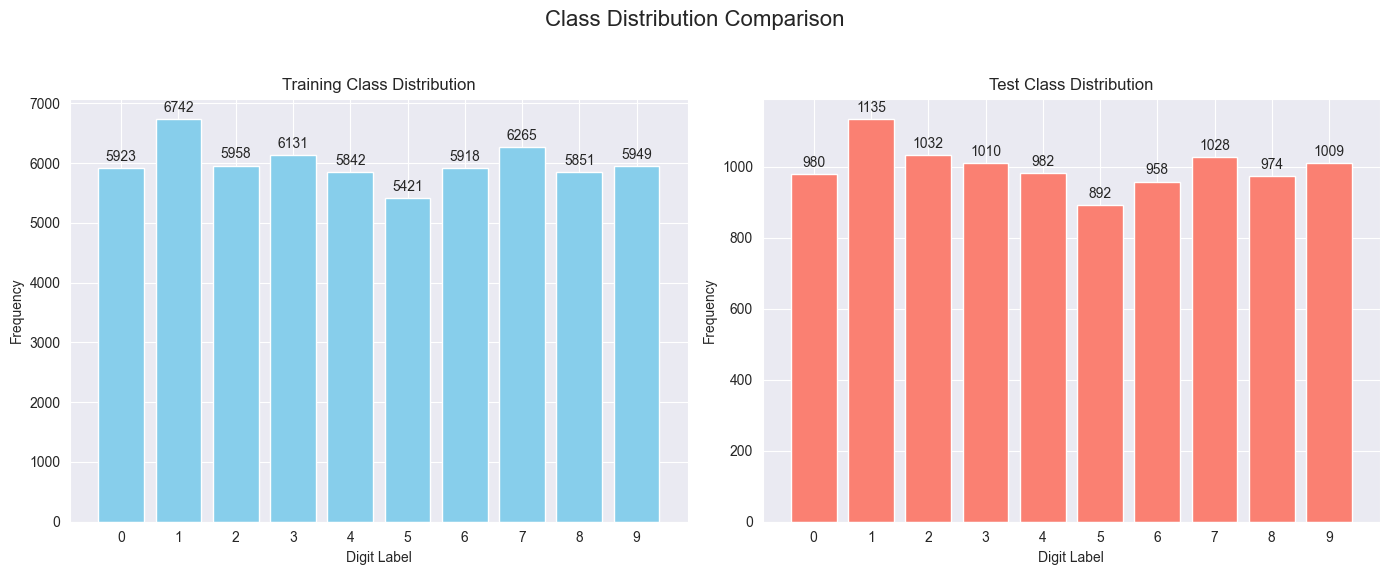

In [8]:
# Plot the combined class distribution for training and test datasets
plot_class_distribution(y_train, y_test)

## 2. Random Forest Classifier

We now train and evaluate the Random Forest classifier. This classifier uses a scikit‑learn implementation.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


D:\Work\Neural network\Image_classification-OOP\Image_classification-OOP\classifier\result_plot.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


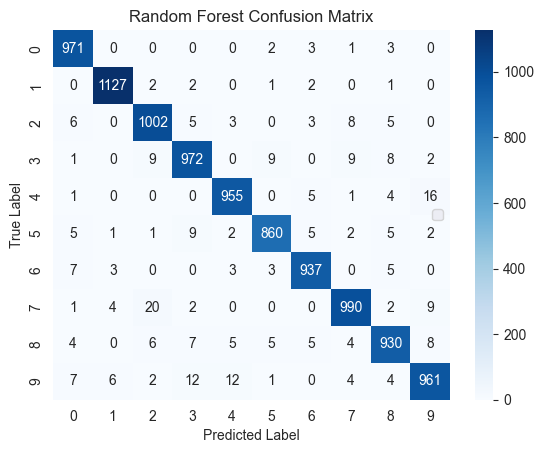

In [9]:
# Initialize and train the Random Forest classifier
rf_classifier = MnistRFClassifier()
rf_classifier.train(X_train, y_train)

# Evaluate the classifier on the test dataset
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Plot the confusion matrix for the Random Forest classifier
plot_confusion_matrix(y_test, rf_predictions, "Random Forest")

## 3. Feed‑Forward Neural Network

Next, we train and evaluate a simple feed‑forward neural network implemented in PyTorch.

Epoch 1/10: Train Loss: 0.3343, Train Acc: 0.9055 | Val Loss: 0.1593, Val Acc: 0.9518
Epoch 2/10: Train Loss: 0.1410, Train Acc: 0.9587 | Val Loss: 0.1085, Val Acc: 0.9680
Epoch 3/10: Train Loss: 0.0957, Train Acc: 0.9722 | Val Loss: 0.0860, Val Acc: 0.9739
Epoch 4/10: Train Loss: 0.0731, Train Acc: 0.9784 | Val Loss: 0.0736, Val Acc: 0.9773
Epoch 5/10: Train Loss: 0.0569, Train Acc: 0.9828 | Val Loss: 0.0639, Val Acc: 0.9793
Epoch 6/10: Train Loss: 0.0470, Train Acc: 0.9854 | Val Loss: 0.0728, Val Acc: 0.9770
Epoch 7/10: Train Loss: 0.0387, Train Acc: 0.9883 | Val Loss: 0.0584, Val Acc: 0.9821
Epoch 8/10: Train Loss: 0.0331, Train Acc: 0.9899 | Val Loss: 0.0612, Val Acc: 0.9804
Epoch 9/10: Train Loss: 0.0272, Train Acc: 0.9918 | Val Loss: 0.0610, Val Acc: 0.9818
Epoch 10/10: Train Loss: 0.0237, Train Acc: 0.9926 | Val Loss: 0.0626, Val Acc: 0.9820
Feed‑Forward NN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99  

D:\Work\Image_classification-OOP\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


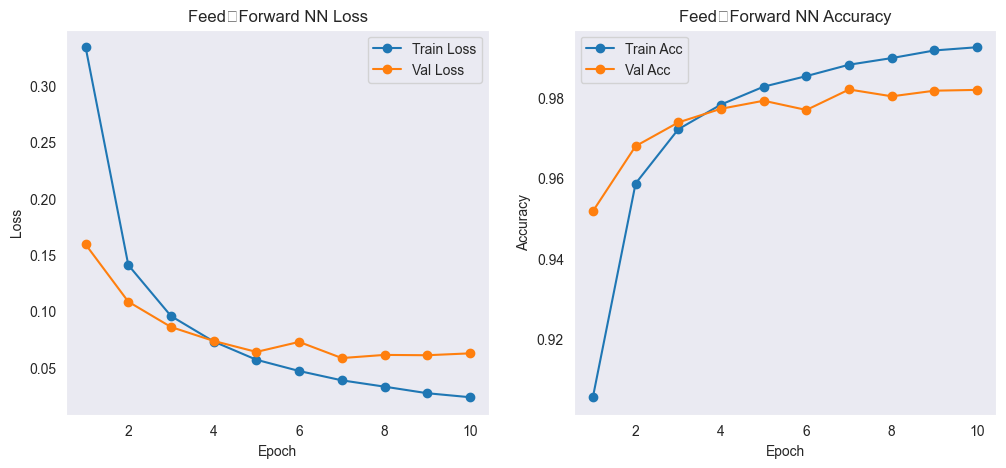

D:\Work\Neural network\Image_classification-OOP\Image_classification-OOP\classifier\result_plot.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
D:\Work\Image_classification-OOP\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


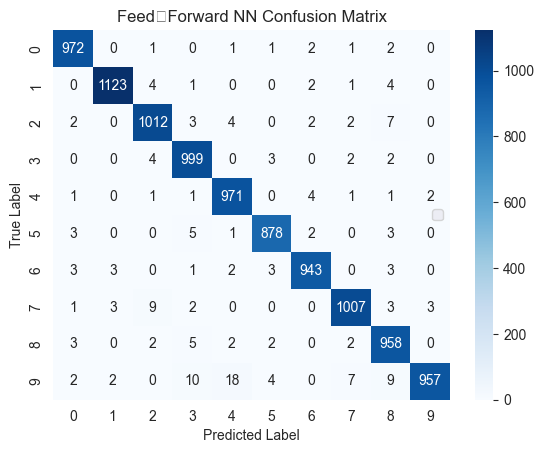

In [12]:
# Check if CUDA is available and set the device accordingly
device = 'cuda' if torch.cuda.is_available() else 'cpu'


# Initialize and train the Feed‑Forward Neural Network classifier
nn_classifier = MnistNNClassifier(device=device)
history_nn = nn_classifier.train(X_train, y_train, epochs=10, batch_size=128, X_val=X_test, y_val=y_test)

# Evaluate the network on the test dataset
nn_predictions = nn_classifier.predict(X_test)
print("Feed‑Forward NN Classification Report:")
print(classification_report(y_test, nn_predictions))

# Plot training metrics and confusion matrix for the Feed‑Forward NN
plot_metrics(history_nn, "Feed‑Forward NN")
plot_confusion_matrix(y_test, nn_predictions, "Feed‑Forward NN")

## 4. Convolutional Neural Network

Finally, we train and evaluate a convolutional neural network (CNN), which is typically more effective for image classification tasks.

Epoch 1/10: Train Loss: 0.3024, Train Acc: 0.9139 | Val Loss: 0.1052, Val Acc: 0.9683
Epoch 2/10: Train Loss: 0.0987, Train Acc: 0.9705 | Val Loss: 0.0780, Val Acc: 0.9757
Epoch 3/10: Train Loss: 0.0713, Train Acc: 0.9782 | Val Loss: 0.0594, Val Acc: 0.9807
Epoch 4/10: Train Loss: 0.0560, Train Acc: 0.9827 | Val Loss: 0.0456, Val Acc: 0.9853
Epoch 5/10: Train Loss: 0.0474, Train Acc: 0.9860 | Val Loss: 0.0420, Val Acc: 0.9860
Epoch 6/10: Train Loss: 0.0384, Train Acc: 0.9879 | Val Loss: 0.0393, Val Acc: 0.9861
Epoch 7/10: Train Loss: 0.0327, Train Acc: 0.9900 | Val Loss: 0.0484, Val Acc: 0.9846
Epoch 8/10: Train Loss: 0.0291, Train Acc: 0.9906 | Val Loss: 0.0384, Val Acc: 0.9870
Epoch 9/10: Train Loss: 0.0237, Train Acc: 0.9926 | Val Loss: 0.0398, Val Acc: 0.9866
Epoch 10/10: Train Loss: 0.0228, Train Acc: 0.9930 | Val Loss: 0.0405, Val Acc: 0.9866
Convolutional NN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99 

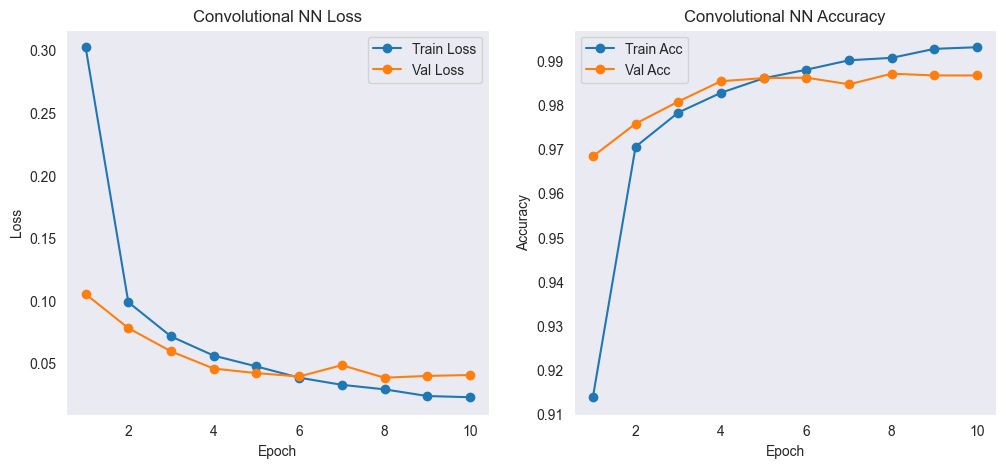

D:\Work\Neural network\Image_classification-OOP\Image_classification-OOP\classifier\result_plot.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


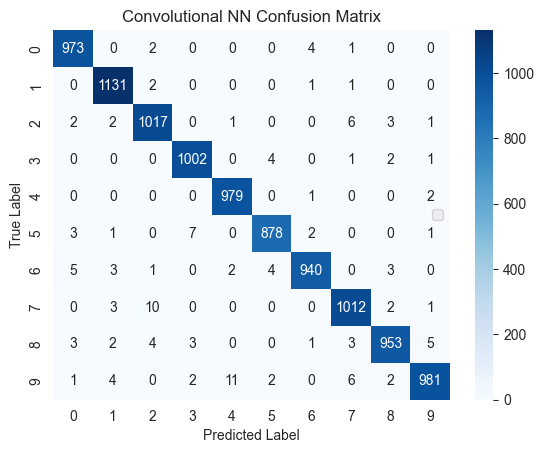

In [13]:
# Initialize and train the Convolutional Neural Network classifier
cnn_classifier = MnistCNNClassifier(device=device)
history_cnn = cnn_classifier.train(X_train, y_train, epochs=10, batch_size=128, X_val=X_test, y_val=y_test)

# Evaluate the CNN on the test dataset
cnn_predictions = cnn_classifier.predict(X_test)
print("Convolutional NN Classification Report:")
print(classification_report(y_test, cnn_predictions))

# Plot training metrics and confusion matrix for the CNN
plot_metrics(history_cnn, "Convolutional NN")
plot_confusion_matrix(y_test, cnn_predictions, "Convolutional NN")

## 5. Conclusion

In this notebook, we have:
- Loaded and explored the MNIST dataset.
- Visualized sample images and class distributions.
- Trained and evaluated three different classifiers:
  - Random Forest
  - Feed‑Forward Neural Network
  - Convolutional Neural Network

The CNN generally performs best on image data due to its ability to capture spatial hierarchies. You can further experiment with model parameters, architectures, or training epochs to optimize performance.